## Car Crashes in Montgomery County EDA

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 50)

### Import Data

In [2]:
# Original crash data
crash_orig_df = pd.read_csv('./data/crash_reporting_drivers_data.csv', low_memory=False)
crash_orig_df['Crash Date/Time'] = pd.to_datetime(crash_orig_df['Crash Date/Time'])

In [3]:
# Modified crash data
crash_mod_df = pd.read_csv('./data/crash_data_modified.csv', low_memory=False)

In [4]:
# Categorized crash data
crash_cats_df = pd.read_csv('./data/crash_categorical.csv', low_memory=False)

### Functions

In [5]:
# Prints subplots (sns.countplots) for drivers at fault, under the influence, and distracted in crashes
# Percentages on bars idea from:
#### https://stackoverflow.com/a/63479557
#### https://www.tutorialspoint.com/how-to-add-percentages-on-top-of-bars-in-seaborn-using-matplotlib

def get_fault_drug_distracted(daf, dsa, dd):
    fig = plt.figure(figsize = (15,5))
    
    ax1 = fig.add_subplot(1,3,1)
    total1 = float(crash_mod_df[daf].count())
    ax_1 = sns.countplot(data = crash_mod_df, x = daf, ax=ax1)
    for p in ax_1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_1.annotate(percentage, (x, y),ha='center')
    
    ax2 = fig.add_subplot(1,3,2)
    total2 = float(crash_mod_df[dsa].count())
    ax_2 = sns.countplot(data = crash_mod_df, x = dsa, ax=ax2)
    for p in ax_2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_2.annotate(percentage, (x, y),ha='center')
    
    ax3 = fig.add_subplot(1,3,3)
    total3 = float(crash_mod_df[dsa].count())
    ax_3 = sns.countplot(data = crash_mod_df, x = dd, ax=ax3);
    for p in ax_3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total3)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax_3.annotate(percentage, (x, y),ha='center')

In [6]:
# gets sns.countplot for one feature
def get_count(df, feature):
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by {feature}')
    total = float(df[feature].count())
    plt.xticks(rotation = 50)
    ax = sns.countplot(data = df, x = feature);
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [7]:
def get_intersections(df):
    df_inters = df[['Road Name', 'Cross-Street Name']]
    df_inters1 = df_inters.dropna()
    # Needed to avoid nasty warning
    df_inters2 = df_inters1.copy(deep=True)
    df_inters2['intersection'] = df_inters2['Road Name'] + " and " + df_inters2['Cross-Street Name']
    
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by Intersection')
    total = float(df_inters2['intersection'].count())
    plt.xticks(rotation = 50)
    ax = sns.countplot(data = df_inters2, x = 'intersection', 
                       order=df_inters2['intersection'].value_counts().iloc[:10].index);
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

### Yearly Crash Trend

In [9]:
def get_count_no_pct(df, feature):
    plt.figure(figsize = (15,5))
    plt.title(f'Count of Crashes by {feature}')
    plt.xticks([0,1,2,3,4,5,6],['2015','2016','2017','2018','2019','2020','2021(Jan-Nov)'])
    sns.countplot(data = df, x = feature);

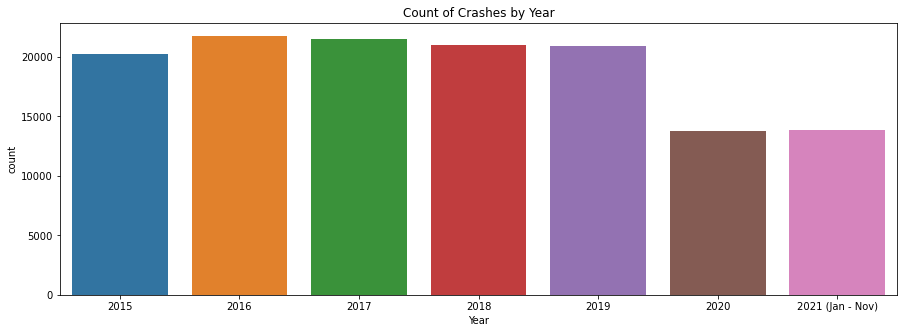

In [10]:
crash_orig_df['Year'] = crash_orig_df['Crash Date/Time'].dt.year
crashes_yearly = crash_orig_df[['Year']]
crashes_yearly1 = crashes_yearly.sort_values(by='Year')
crashes_yearly1['Year'] = crashes_yearly1['Year'].apply(lambda x: str(x))
#Not sure why this code breaks at the next line.
#crashes_yearly1['Year'] = crashes_yearly1['Year'].apply(lambda x: '2021 (Jan - Nov)' if x == '2021')
# However, this line works
crashes_yearly1['Year'] = crashes_yearly1['Year'].map({'2015': '2015', 
                                                       '2016': '2016',                                                       '2016': '2016',
                                                       '2017': '2017',
                                                       '2018': '2018',
                                                       '2019': '2019',
                                                       '2020': '2020',
                                                       '2021': '2021 (Jan - Nov)'})
get_count_no_pct(crashes_yearly1, 'Year')

### Counts: Driver at-fault, Driver Drug Abuse, and Driver Distracted

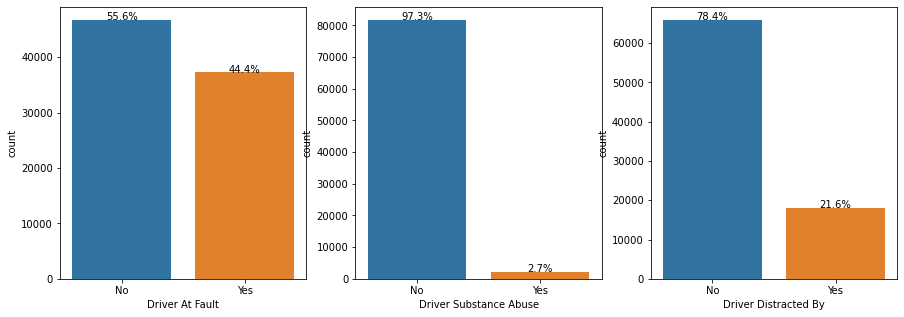

In [11]:
get_fault_drug_distracted('Driver At Fault', 'Driver Substance Abuse', 'Driver Distracted By')

### Count: Time of Day Crash Occurred

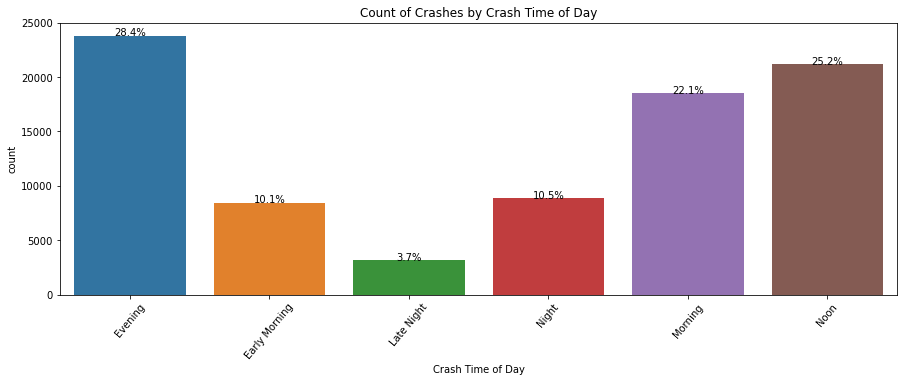

In [12]:
get_count(crash_mod_df, 'Crash Time of Day')

### Count: Surface Conditions at Time of Crash

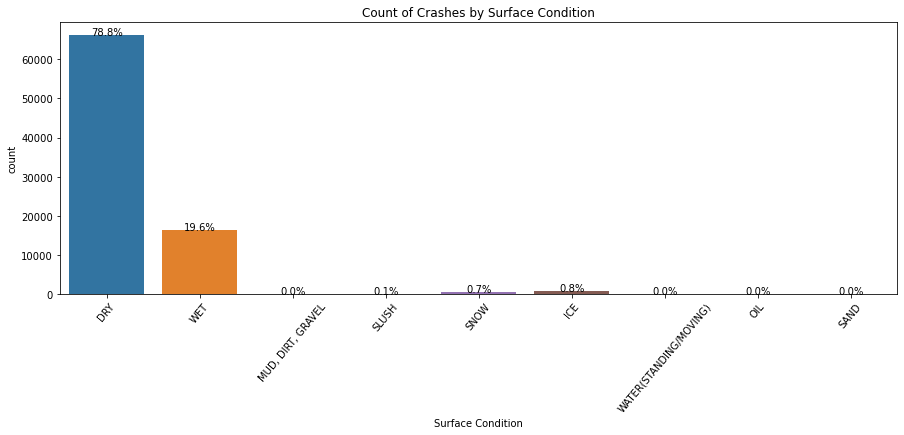

In [13]:
get_count(crash_mod_df, 'Surface Condition')

### Count: Weather Conditions at Time of Crash

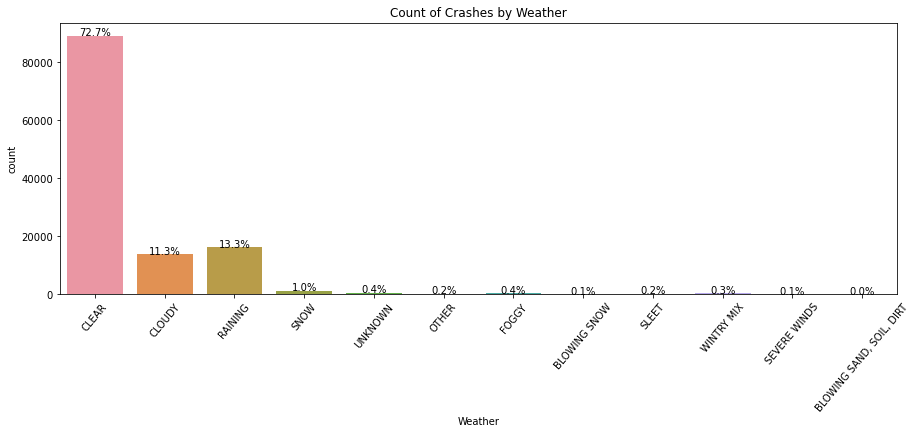

In [14]:
get_count(crash_orig_df, 'Weather')

### Count: Crashes by Intersection

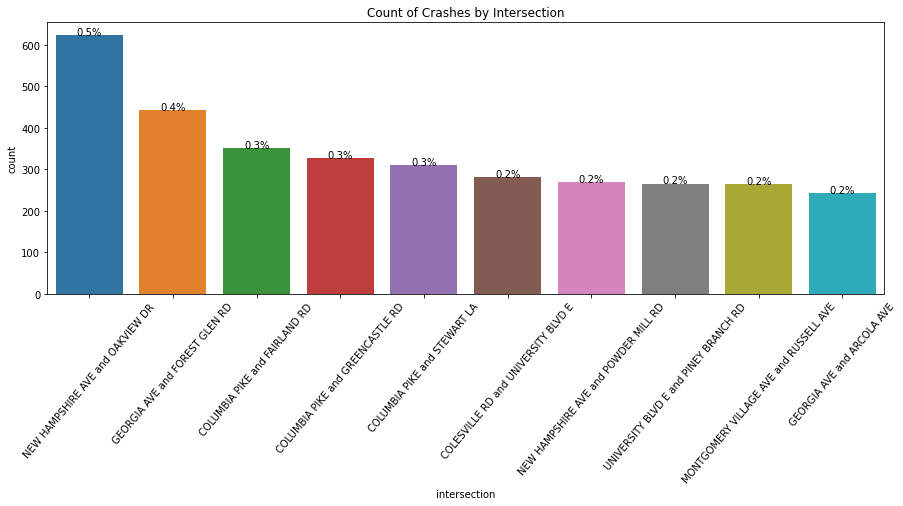

In [15]:
get_intersections(crash_orig_df)

### Count: Crash by Lighting

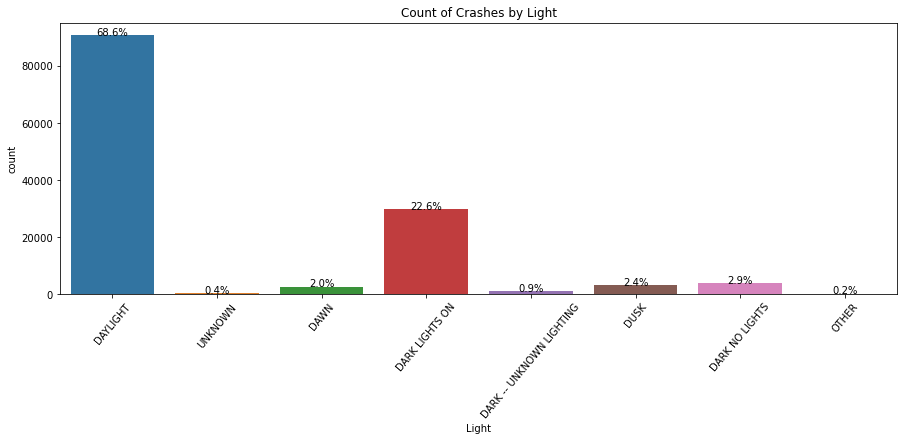

In [16]:
get_count(crash_orig_df, 'Light')

### Further EDA (Jalil) - Exploring Features that Lead to Accidents

##### Using more features from the original data set:

In [17]:
#Clean original data frame to use other features. 
crash_orig_df
crash_orig_df.drop(columns = ['Circumstance', 
                        'Off-Road Description', 
                        'Municipality', 
                        'Related Non-Motorist', 
                        'Non-Motorist Substance Abuse',
                        'Person ID',
                        'Vehicle ID',
                        'Latitude',
                        'Longitude',
                        'Location',
                        'Vehicle Damage Extent',
                        'Report Number',
                        'Local Case Number',
                        'Agency Name',
                        'ACRS Report Type',
                        'Cross-Street Name',
                        'Vehicle Movement',
                        'Vehicle Continuing Dir',
                        'Vehicle Going Dir',
                        'Vehicle First Impact Location',
                        'Vehicle Second Impact Location',
            
                        ],inplace = True)

In [18]:
crash_orig_df['Driver Substance Abuse'].fillna('NONE DETECTED', inplace=True)
crash_orig_df['Traffic Control'].fillna('NO CONTROLS', inplace=True)
crash_orig_df.dropna(inplace = True)
crash_orig_df['Driver Substance Abuse'] = crash_orig_df['Driver Substance Abuse'].apply(lambda x: 'No' if x == 'NONE DETECTED' else 'Yes')

In [19]:
crash_orig_df['Crash Time of Day'] = (crash_orig_df['Crash Date/Time'].dt.hour % 24 + 4) // 4
crash_orig_df['Crash Time of Day'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [20]:
print(crash_orig_df.shape)
print(crash_mod_df.shape)

(82869, 24)
(83983, 14)


##### Explanation:
For my EDA I wanted to use features such as severity of injury, vehicle make, and vehicle year. Because those are not part of the cleaned data frame, I took the original data frame and did similar cleaning Rufus did on the modified data frame. This was simpler than adding back those columns into the modified data frame because the indices are different, I did not want to risk matching the wrong information together. The data set I modified and the one rufus did have approximately the same shape.

### Exploring Severity of Injury

Exploring the severity of the injury enables us to understand the degree of danger in an accident. The more severe an accident the more urgent resources should be allocated to prevent them from reoccuring. 

#### Substance Abuse vs Injury

In [21]:
def substance_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} vs Substance Abuse')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Injury Severity']== f'{feature}'].groupby('Driver Substance Abuse')['Injury Severity'].count().sort_values(ascending = False).plot(kind = 'bar')
    plt.xticks(rotation = 0)
    total = (crash_orig_df['Injury Severity']== f'{feature}').sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None)

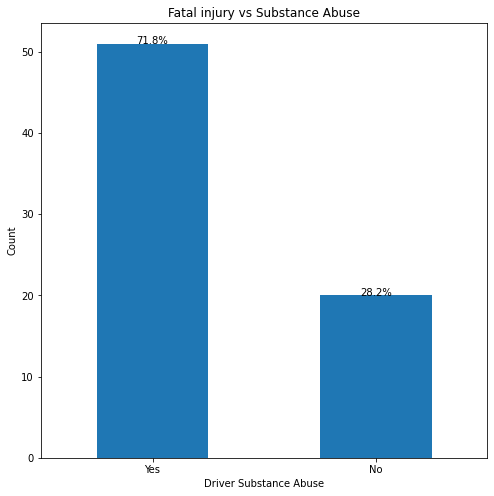

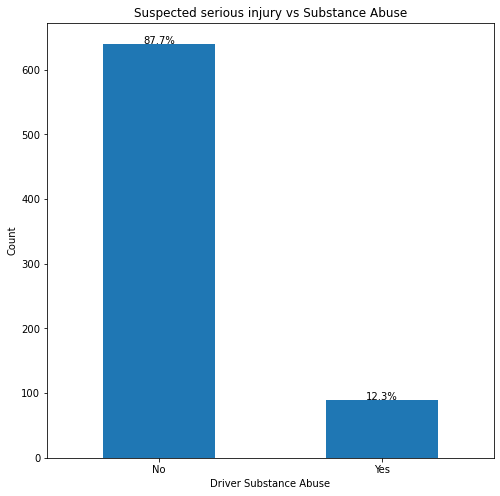

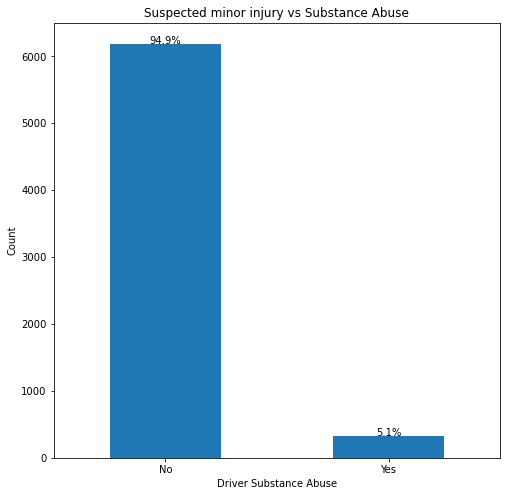

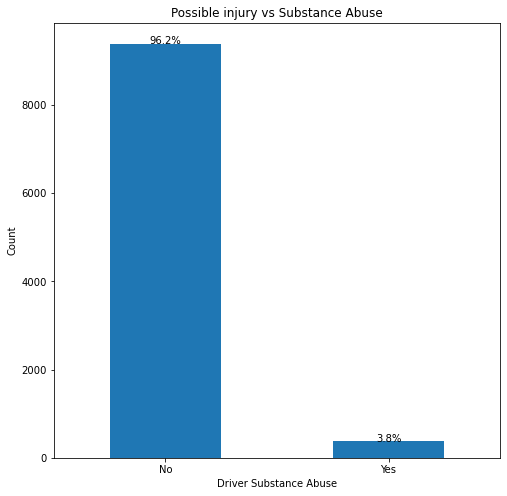

In [22]:
substance_crash('FATAL INJURY'),substance_crash('SUSPECTED SERIOUS INJURY'),substance_crash('SUSPECTED MINOR INJURY'),substance_crash('POSSIBLE INJURY')

##### Observations:
From the graphs above, we are able to see that for Fatal Injuries, about 72% of the drivers that were at fault were intoxicated. Looking at the other injuries decreasing in severity, most of the drivers at fault are non-intoxicated. 

#### Time of the Day vs Severity of Injury

In [24]:
def time_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} vs Time of the day')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Injury Severity']== f'{feature}'].groupby('Crash Time of Day')['Injury Severity'].count().sort_values(ascending = False).plot(kind = 'bar')
    total = (crash_orig_df['Injury Severity']== f'{feature}').sum()
    plt.xticks(rotation = 45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')


(None, None, None, None)

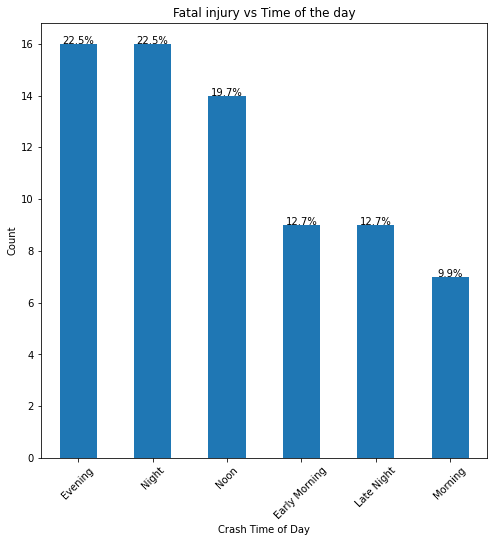

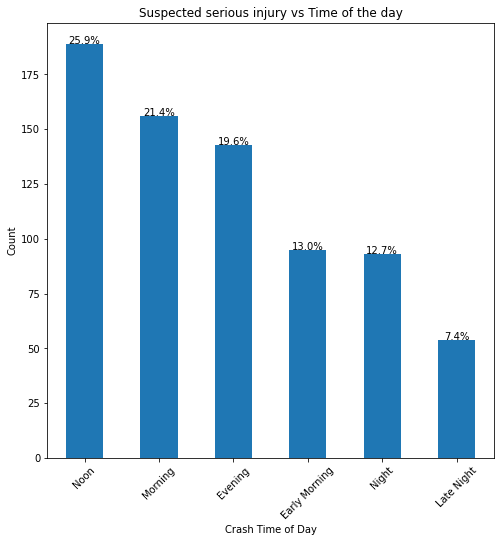

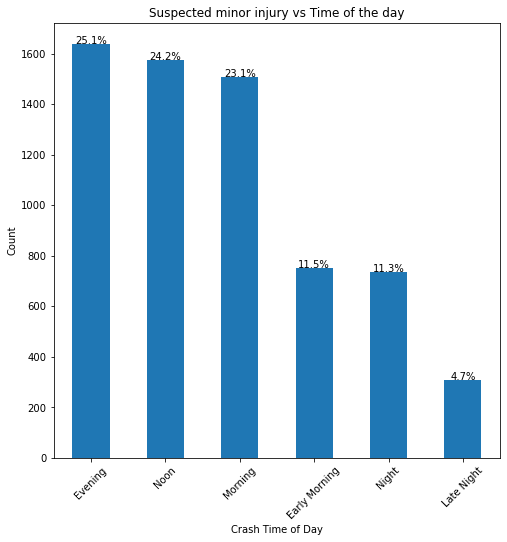

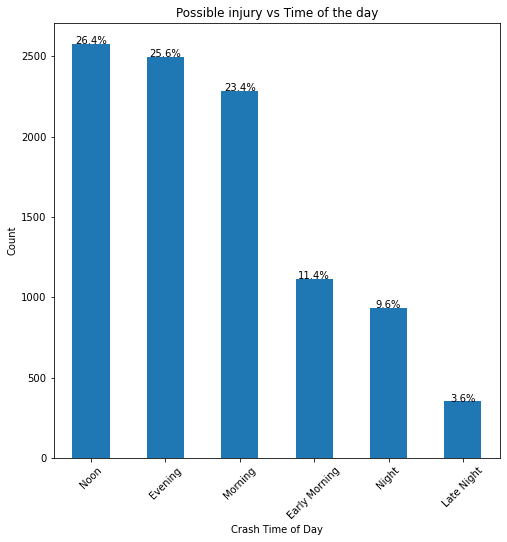

In [25]:
time_crash('FATAL INJURY'),time_crash('SUSPECTED SERIOUS INJURY'),time_crash('SUSPECTED MINOR INJURY'),time_crash('POSSIBLE INJURY')

##### Observation:
What can be seen from the trends above is that noon is a recurrent time when most injuries take place. Reason for so: individuals get out of work to have lunch and are in a rush resulting in car accidents. This can leave room for further recommendation such as allocating more police officers during noon. Another recommendation would be to insight people to not use their vehicles during the day.This can be done by offering public bikes that can be rented through out the city (e.g.: citi bikes, jump bikes, and etc.) or make a campaign on the health benefits of walking. If we want to go even further than this, this leaves room for entrepreneurs. Make an app that scores people that walk the most, this would result in coupons they could apply in their local stores. Doing so would encourage people to walk, especially when there is day time and it is for a short distance. 

##### Vehicle Body Type vs Severity of Injury

In [26]:
def vehicle_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} vs Vehicle Body Type')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Injury Severity'] == f'{feature}'].groupby('Vehicle Body Type')['Injury Severity'].count().sort_values(ascending = False).head().plot(kind = 'bar')
    total = (crash_orig_df['Injury Severity']== f'{feature}').sum()
    plt.xticks(rotation = 45)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None)

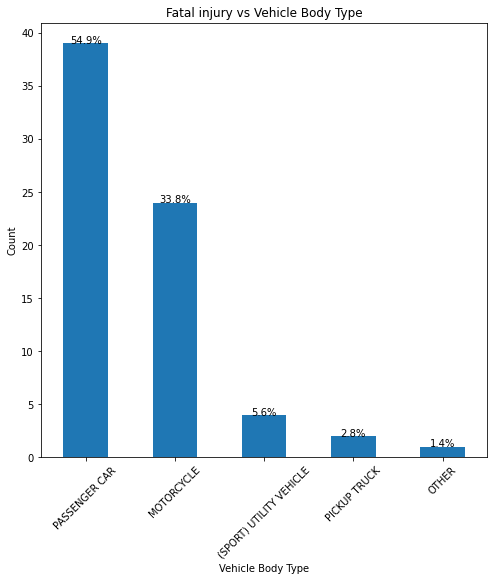

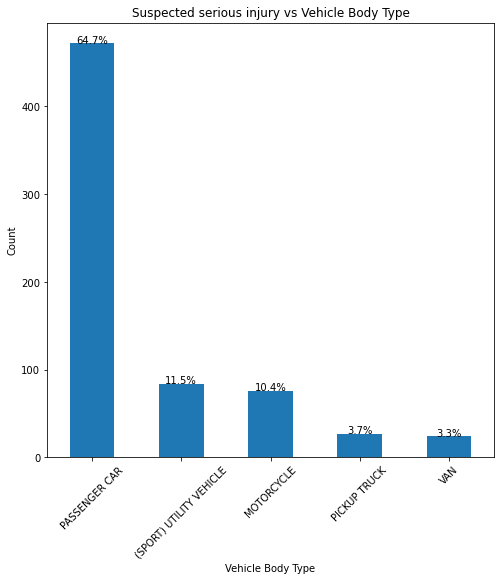

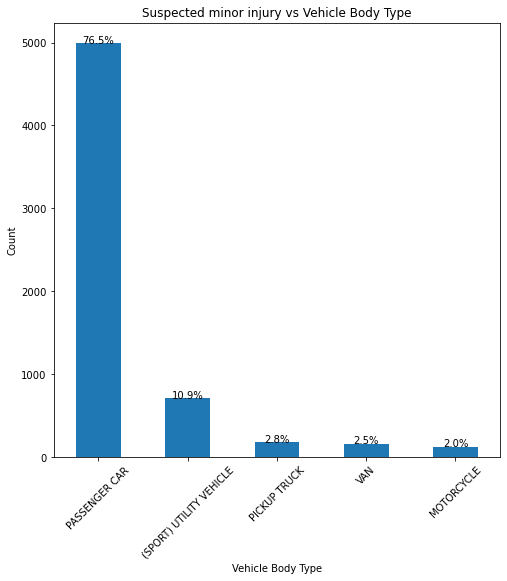

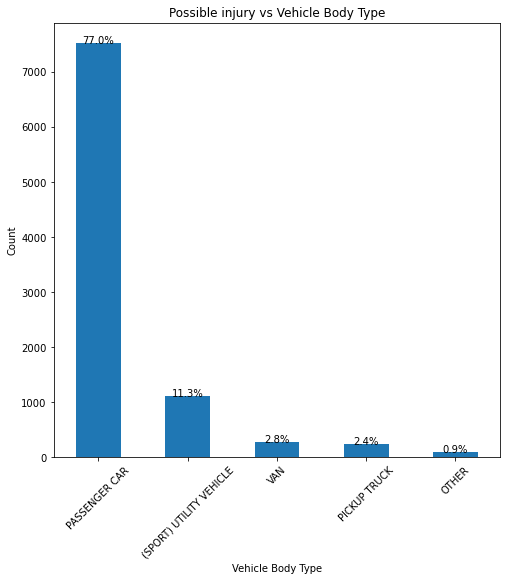

In [27]:
vehicle_crash('FATAL INJURY'),vehicle_crash('SUSPECTED SERIOUS INJURY'),vehicle_crash('SUSPECTED MINOR INJURY'),vehicle_crash('POSSIBLE INJURY')

##### Observations:
Looking at the most sever injuries (fatal and suspected serious injuries) we are able to see that the top 3 most dangerous vehicles are passenger cars, sport cars, and motorcyles. Next as the severity of the injury decreases, we are able to see that vans and pick up trucks are the next vehicles that cause car accidents.

### Looking at Single Vehicle Body Types vs Fault

In [56]:
def fault_crash(feature):
    plt.figure(figsize = (8,8))
    plt.title(f'{feature.lower().capitalize()} vs Driver Fault')
    plt.ylabel('Count')
    ax = crash_orig_df[crash_orig_df['Vehicle Body Type']==f'{feature}'].groupby('Driver At Fault')['Vehicle Body Type'].count().sort_values(ascending = False).head(2).plot(kind = 'bar')
    total = (crash_orig_df['Vehicle Body Type']== f'{feature}').sum()
    plt.xticks(rotation = 0)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

(None, None, None, None, None)

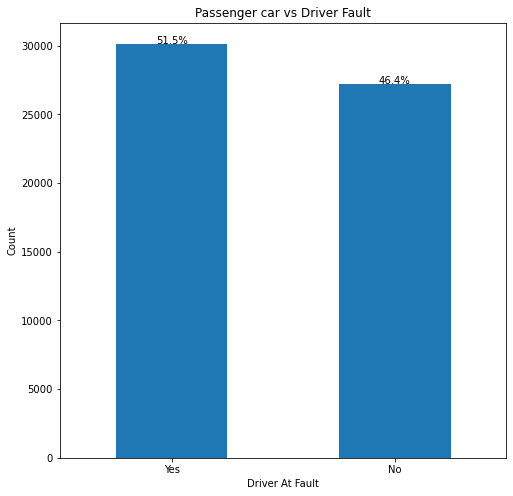

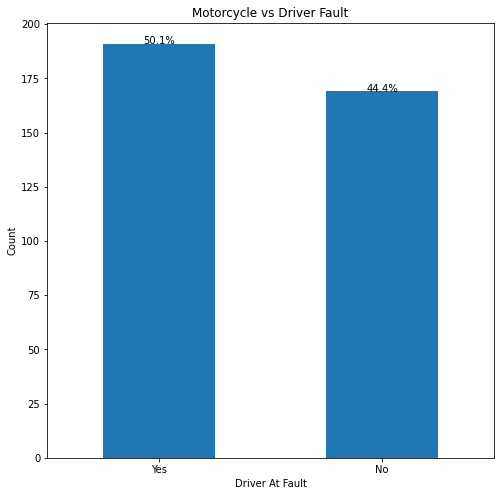

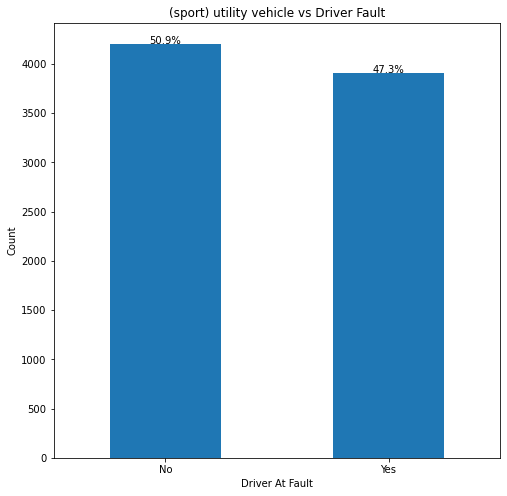

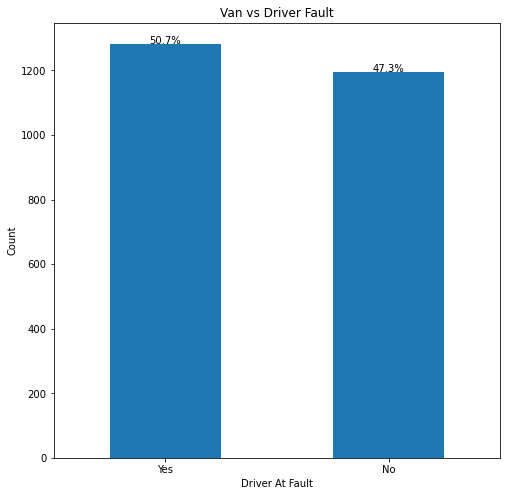

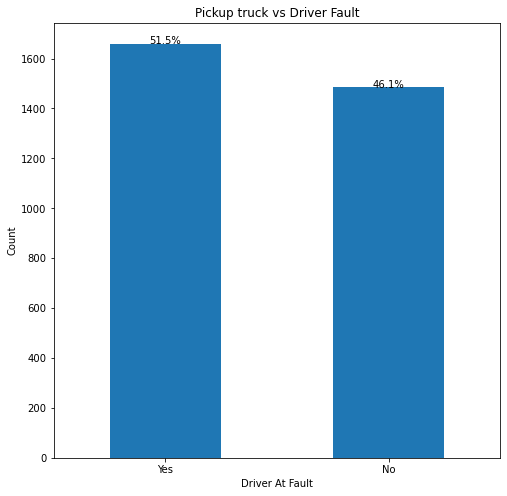

In [57]:
fault_crash('PASSENGER CAR'),fault_crash('MOTORCYCLE'),fault_crash('(SPORT) UTILITY VEHICLE'),fault_crash('VAN'),fault_crash('PICKUP TRUCK')

##### Observations:
Looking at the data above passenger cars, motorcyles, vans, and pick up trucks are at fault 50% of the time or more. The only vehicle that is at fault less than 50% of the time is sports cars.

### Looking At Road Types

In [68]:
(crash_orig_df['Route Type']).count()

82869

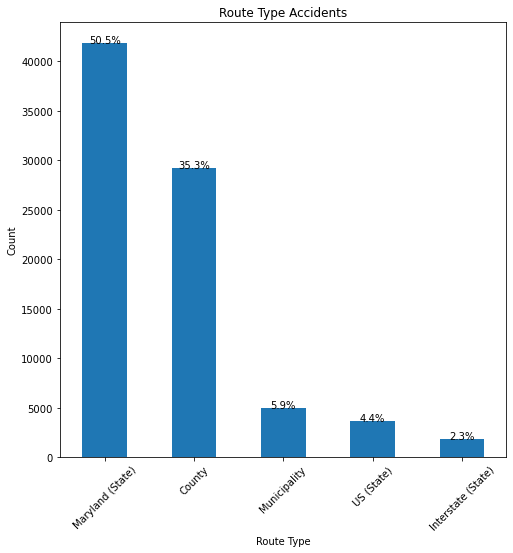

In [70]:
plt.figure(figsize = (8,8))
plt.title('Route Type Accidents')
plt.ylabel('Count')
ax = crash_orig_df.groupby('Route Type')['Vehicle Body Type'].count().sort_values(ascending = False).head().plot(kind = 'bar')
plt.xticks(rotation = 45)
total = (crash_orig_df['Route Type']).count()
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

##### Observations:
We are able to see from the plot above where most accidents happen. Maryland (State) and County account for about 86% of the accidents.
Note: Not sure what rout types accounts for (is it the location of the road or the name of the road).